# Benvenuti - Lezione 01 del corso AI e ML per Diagnostica Medica
- Docente: Lorenzo Bassetti

## Introduzione a Python e Librerie Essenziali (Modulo 0 - 1h)
Questa sezione è dedicata ai partecipanti che devono assicurarsi di avere un ambiente di sviluppo configurato correttamente.

#### Configurazione dell'Ambiente
Useremo Google Colab o Jupyter Notebook.

In [10]:
# !pip install numpy pandas matplotlib scikit-learn tensorflow torch opencv-python

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import cv2

print("TensorFlow Version:", tf.__version__)
print("PyTorch Version:", torch.__version__)

TensorFlow Version: 2.17.0
PyTorch Version: 2.5.1+cpu


---

## Introduzione all’AI e ML per Diagnostica Medica (Modulo 1 - 3h)

L’Intelligenza Artificiale (AI) è il concetto più ampio, mentre Machine Learning (ML) e Deep Learning (DL) sono sottoinsiemi di AI.

Tecnologia	Descrizione	Esempi in Sanità
> AI (Intelligenza Artificiale)	Qualsiasi sistema in grado di simulare capacità umane come il ragionamento e il problem-solving.	Chatbot per supporto clinico, sistemi di decisione per farmaci.

> ML (Machine Learning)	Sistemi che apprendono dai dati e migliorano la loro performance senza essere riprogrammati.	Modelli predittivi per la diagnosi precoce.

> DL (Deep Learning)	Algoritmi ML avanzati basati su reti neurali profonde che analizzano dati complessi.	Reti neurali convoluzionali per il rilevamento del cancro ai polmoni.

> GenAI .... cos'è ?


###  Machine Learning: Supervised, Unsupervised e Deep Learning
Il Machine Learning (ML) è una sottocategoria dell’AI che permette ai sistemi di apprendere dai dati senza essere esplicitamente programmati.

- Supervised Learning	Il modello impara da dati etichettati, con input e output noti.	Classificazione di immagini ecografiche in benigne vs maligne.
- Unsupervised Learning	Il modello cerca pattern nei dati senza etichette.	Raggruppamento di pazienti con tecniche di clustering per analisi epidemiologiche.
- Deep Learning (DL)	Utilizza reti neurali artificiali per apprendere da grandi quantità di dati.	Rilevamento di anomalie in radiografie polmonari con CNN.

###  Generative AI (GenAI) e Applicazioni in Medicina
La Generative AI (GenAI) è una branca dell’AI che genera nuovi dati, immagini o testi basandosi su modelli addestrati su dataset esistenti.

**Come Funziona?**

- Utilizza modelli come GPT (per il linguaggio) e Stable Diffusion, GANs (per le immagini).
- Modelli di trasformatori (es. ChatGPT) apprendono pattern nei dati e generano contenuti nuovi.
- Applicazioni in Diagnostica Medica
- Generazione di immagini mediche sintetiche per aumentare i dataset di training.
- Supporto alle diagnosi con modelli che analizzano sintomi e suggeriscono patologie.
- Traduzione automatica di referti medici per migliorare l’accessibilità.
- Simulazioni cliniche e modelli predittivi per la pianificazione di interventi chirurgici.

### Approfondimento sui Modelli di ML

**Supervised Learning**

Algoritmi comuni: Regressione Logistica, Random Forest, Support Vector Machines (SVM).
Esempio: Modelli per prevedere il rischio di malattia cardiovascolare basati su dati clinici.

**Unsupervised Learning**

Algoritmi comuni: K-Means Clustering, DBSCAN, PCA (Principal Component Analysis).
Esempio: Clusterizzazione di pazienti con sintomi simili per diagnosi più rapide.

**Deep Learning**

Algoritmi comuni: Reti Neurali Convoluzionali (CNN), Long Short-Term Memory (LSTM), Transformer.
Esempio: Reti CNN per segmentare tumori nelle mammografie.

### Pipeline di un Progetto ML
1. Raccolta dati: Immagini diagnostiche, cartelle cliniche, segnali vitali.
2. Pre-elaborazione: Pulizia, normalizzazione, riduzione rumore.
3. Modellazione: Addestramento del modello ML.
4. Validazione e Testing: Metriche di valutazione.
5. Deploy e Interpretabilità: Uso clinico ed Explainable AI.

----

## Caricamento e Visualizzazione di un Dataset Medico


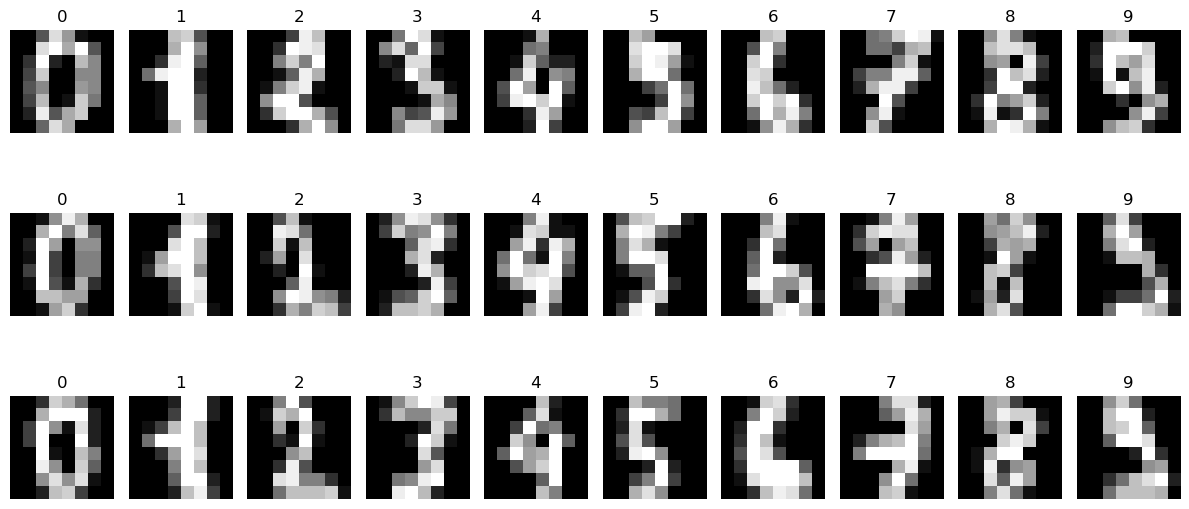

In [12]:
'''
Per semplificare, utilizziamo il dataset Digits di Scikit-learn, che simula immagini mediche.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Caricamento del dataset
digits = load_digits()
images, labels = digits.images, digits.target

# Visualizzazione delle prime 30 immagini in un layout 3x10
fig, axes = plt.subplots(3, 10, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'{labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
    


### Creazione di un Modello ML per la Diagnostica


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Flatten delle immagini per trasformarle in vettori di feature
X = images.reshape(len(images), -1)
y = labels

# Divisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizzazione dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Creazione e addestramento del modello
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = model.predict(X_test)

# Valutazione delle performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Discussione sui Risultati
> Accuracy: indica la percentuale di immagini classificate correttamente.

> Precision e Recall: aiutano a capire la qualità del modello.

> Confusion Matrix: mostra gli errori di classificazione.

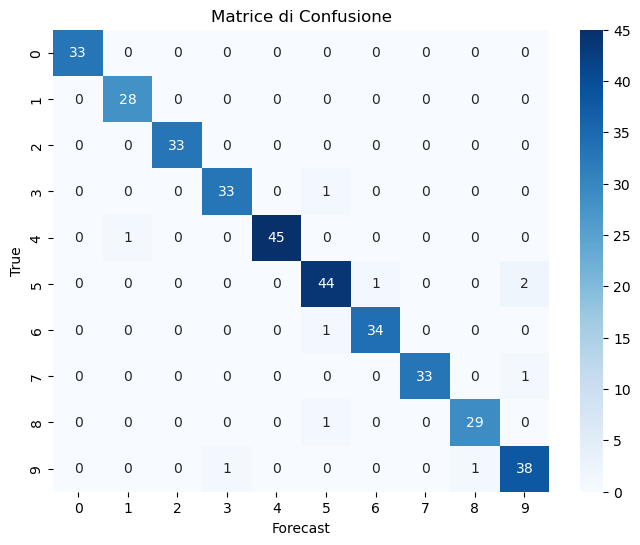

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creazione della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Forecast")
plt.ylabel("True")
plt.title("Matrice di Confusione")
plt.show()



📌 Nota: Questo notebook può essere eseguito direttamente su Google Colab o Jupyter Notebook. Il codice è modulare e può essere esteso con dataset reali.